In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
# check for missing values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Data Visualization

<Axes: xlabel='BP', ylabel='count'>

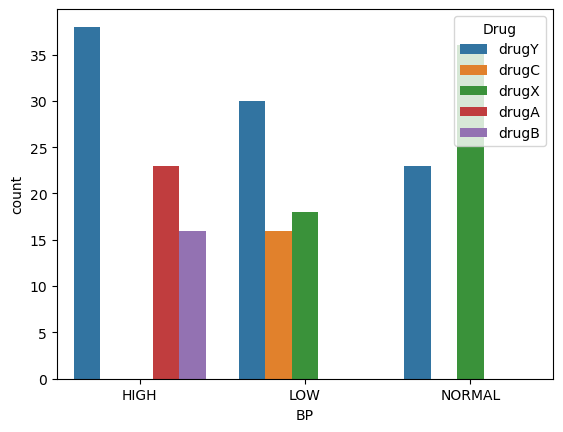

In [5]:
sns.countplot(data = df, x = "BP", hue = "Drug")

**Comment-1 :**

The chart indicate how different medications are distributed among patients with varying blood pressure levels. Patients with normal BP are likely to respond to drugY and drugX. Those with high BP respond to drugY, drugA and drugB. Last but not least, patients having low BP react to drugY, drugC and drugX.


<Axes: xlabel='Age', ylabel='Na_to_K'>

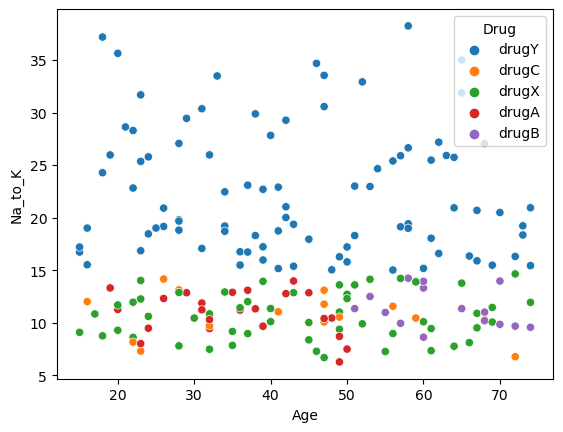

In [6]:
sns.scatterplot(data = df, y = "Na_to_K", x = 'Age', hue = "Drug")

**Comment-2** :

The visualization serves to explore the relationship between Na-to-K ratio and types of drugs prescribed. The difference is clearly shown. Patients with Na-to-K ratio over 15 tend to respond only to drugY, and those with the ratio under 15 are likely to comply with other medications.

<Axes: xlabel='Cholesterol', ylabel='count'>

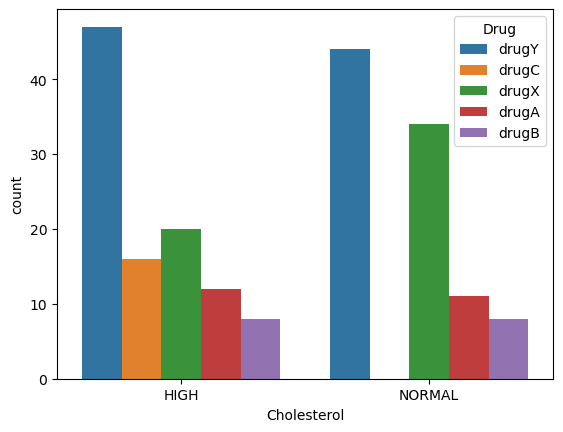

In [7]:
sns.countplot(data = df, x = "Cholesterol", hue = "Drug")

**Comment-3** :

The bar chart shows the distribution of drug types across different cholesterol levels. It appears that drugY is prescribed acorss all cholesterol levels, whereas other drugs are more restricted. DrugC is likely not to be prescribed to patients with normal cholesterol level. 

## Predictive Model

In [8]:
# convert categorial string data into numeric
# here we need to convert data in SEX, BP & CHOLESTEROL
le = LabelEncoder()

label_sex = le.fit_transform(df['Sex'])

# drop old columns and replace new ones
df.drop("Sex", axis=1, inplace=True)
 
df["Sex"] = label_sex

list(le.classes_)
#F = 0     #M = 1

['F', 'M']

In [9]:
label_BP = le.fit_transform(df['BP'])
df.drop("BP", axis=1, inplace=True)
df["BP"] = label_BP

list(le.classes_)
#HIGH = 0       #LOW = 1       #NORMAL = 2

['HIGH', 'LOW', 'NORMAL']

In [10]:
label_chol = le.fit_transform(df['Cholesterol'])
df.drop("Cholesterol", axis=1, inplace=True)
df["Cholesterol"] = label_chol

list(le.classes_)
#HIGH = 0    #NORMAL = 1

['HIGH', 'NORMAL']

In [11]:
df.head()

,Age,Na_to_K,Drug,Sex,BP,Cholesterol
0,23,25.355,drugY,0,0,0
1,47,13.093,drugC,1,1,0
2,47,10.114,drugC,1,1,0
3,28,7.798,drugX,0,2,0
4,61,18.043,drugY,0,1,0


In [12]:
y = df["Drug"]
X = df.drop("Drug", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [13]:
X.columns

Index(['Age', 'Na_to_K', 'Sex', 'BP', 'Cholesterol'], dtype='object')

In [14]:
model.feature_importances_

array([0.13415846, 0.46841105, 0.        , 0.26965516, 0.12777534])

In [15]:
sorted(df["Drug"].unique())

['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

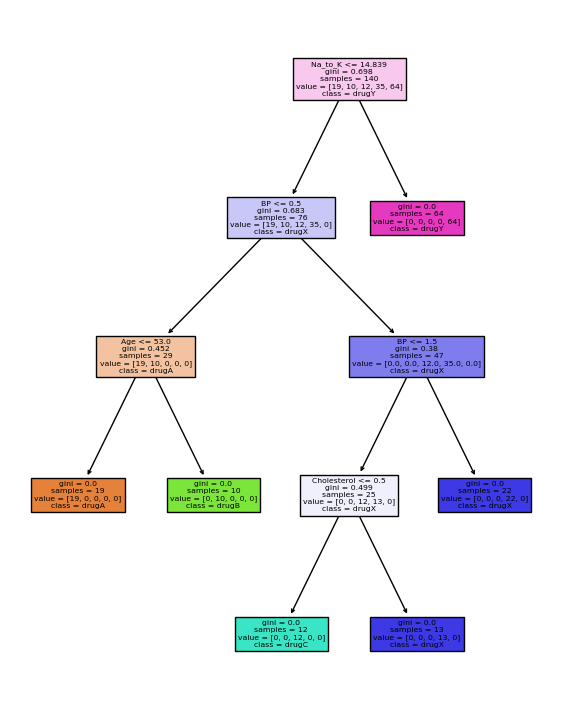

In [16]:
plt.figure(figsize = (7,9),dpi = 100)
plot_tree(model,feature_names=X.columns, class_names = sorted(df["Drug"].unique()), filled=True);

**Comment-4 :**

From the tree, patients with Na-to-K ratio over 14.839 respond to drugY. Those with the ratio inferior or equal to 14.839 are taken into consideration with other features. 

Patients having Na-to-K ratio inferior or equal to 14.839, high level of BP (or BP = 0) and age under 53 years old react to drugA. Those satisfying the same conditions but having age over 53 years old react to drugB.

In [17]:
accuracy_score(y_test, pred)

0.9666666666666667

In [18]:
model.predict([[50, 30, 0,1,1]])

array(['drugY'], dtype=object)

**Comment-5 :**

I create a new patient :
- Age : 50
- Na-to-K ratio : 30
- Sex : M (= 0)
- BP : Low (= 1)
- Cholesterol : Normal (= 1)

#### With these data from the new patient, the model predicted that this patient respond to drugY with over 96% of certainty.